In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
data=pd.read_excel('dataset.xlsx')
df=data.copy()
df.head()



,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


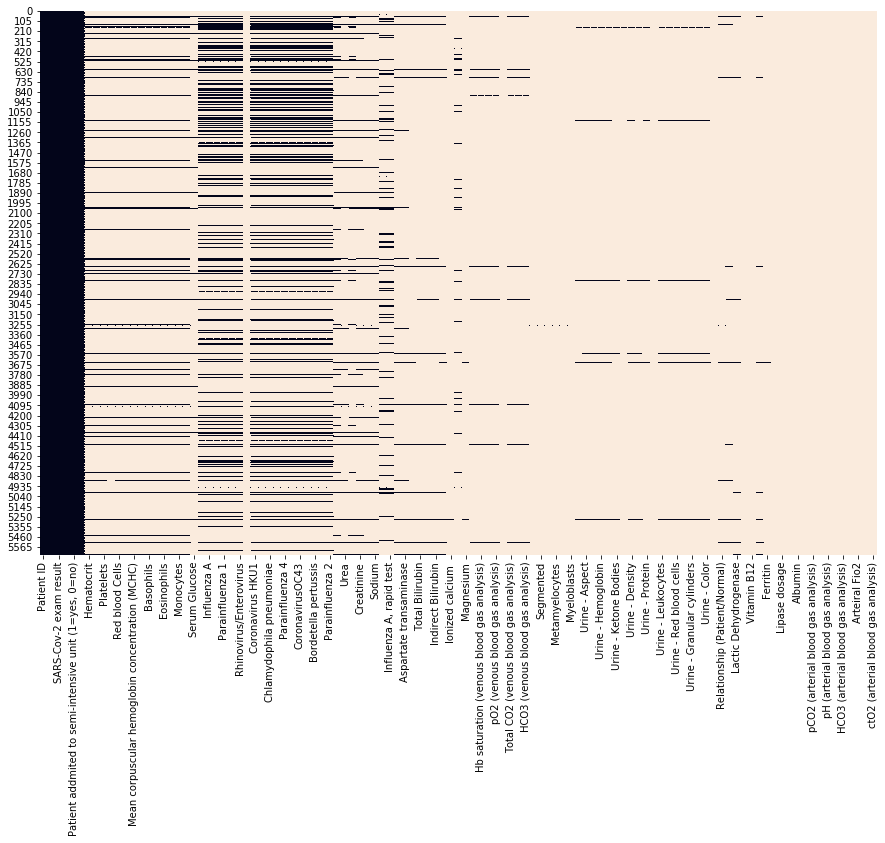

In [3]:
pd.set_option('display.max_columns',111)
pd.set_option('display.max_rows',111)

##identification de la target --> SARS-Cov-2 exam result
## nombre de lignes et de colones (5644,111)
df.shape
##Afficher les NAN
#plt.imshow(df.isna())
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),cbar=False)


In [4]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)


Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [5]:
#supprimer les colonnes ayant bcp de NAN
df=df[df.columns[df.isna().sum()/df.shape[0]<0.9]]
# segmentation des variables
## Test de sang
blood=df[df.columns[(df.isna().sum()/df.shape[0]<0.9) & (df.isna().sum()/df.shape[0]>0.86)]]
##Autres maladies
viral=df[df.columns[(df.isna().sum()/df.shape[0]<0.86) & (df.isna().sum()/df.shape[0]>0.7)]]
#blood.dtypes
#viral.dtypes

positive=df[df['SARS-Cov-2 exam result']=='positive']
negative=df[df['SARS-Cov-2 exam result']=='negative']
df['SARS-Cov-2 exam result'].value_counts()


negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

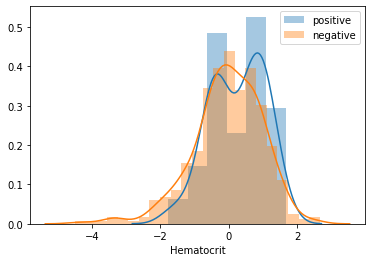

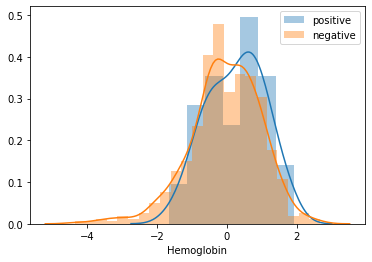

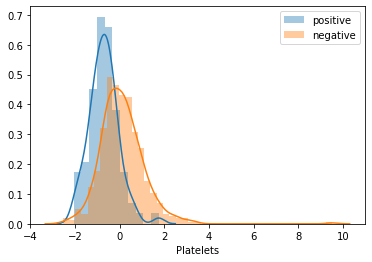

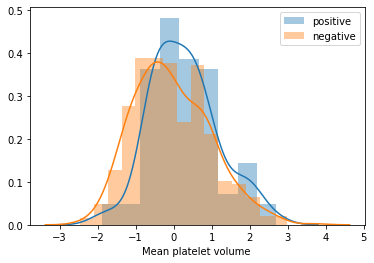

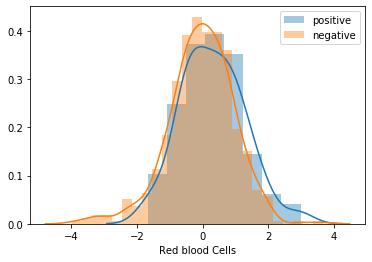

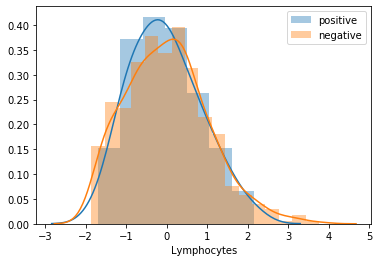

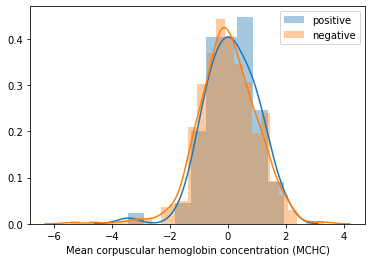

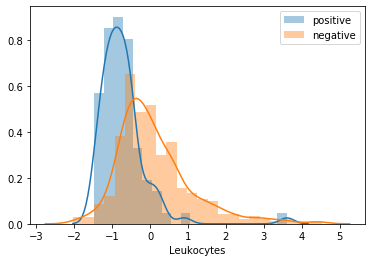

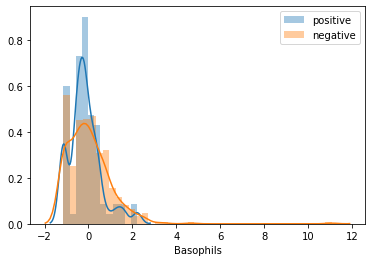

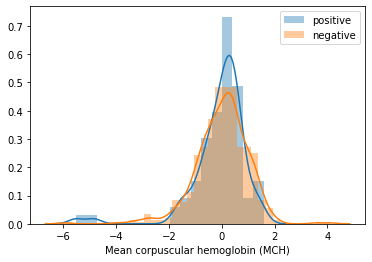

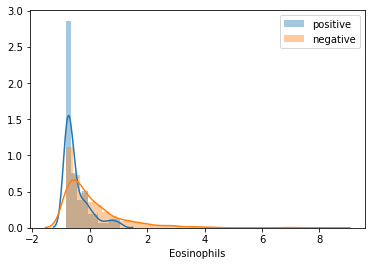

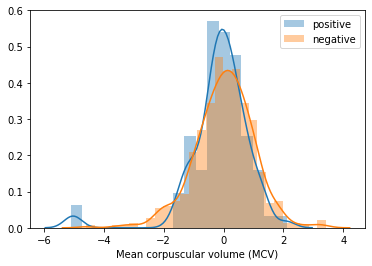

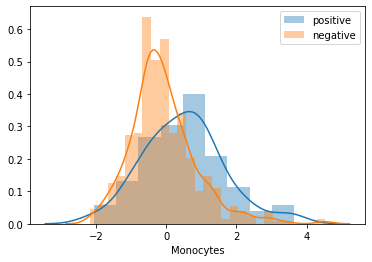

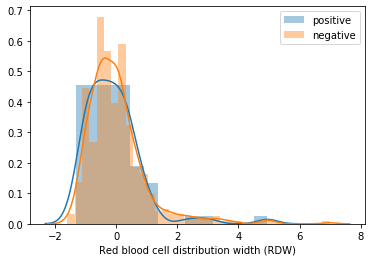

In [6]:
#distribution des variables blood (relation entre les variables blood et y ) 
#=> Monocytes,Leukocytes, patelets peuvent avoir un lien avec le Covid 19
for col in blood.columns :
    plt.figure()
    sns.distplot(positive[col],label='positive')
    sns.distplot(negative[col], label='negative')
    plt.legend()

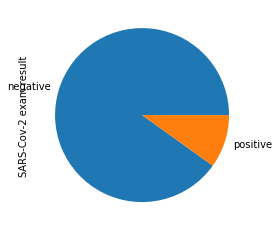

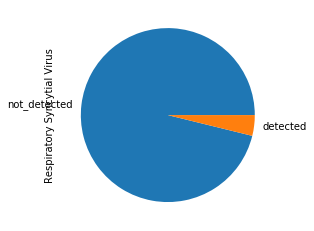

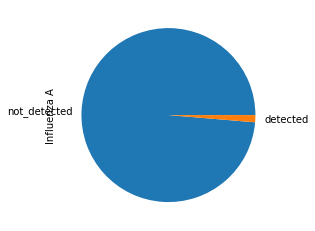

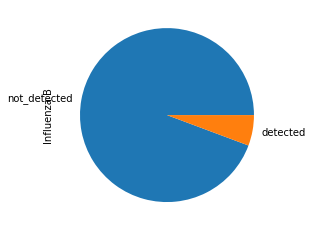

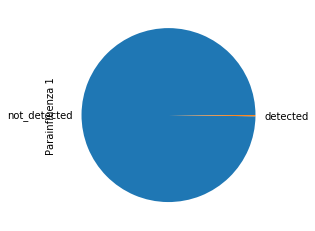

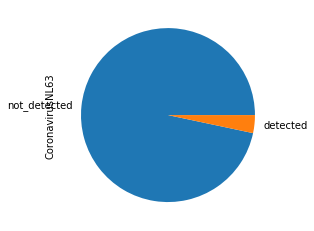

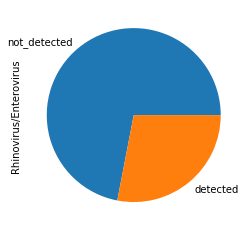

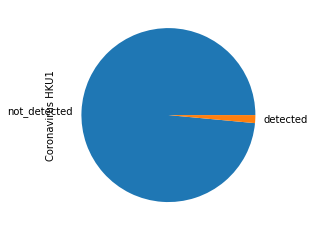

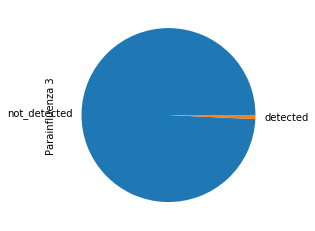

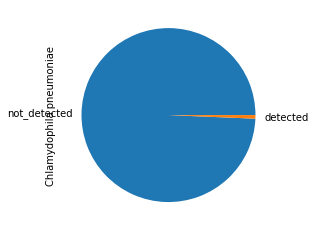

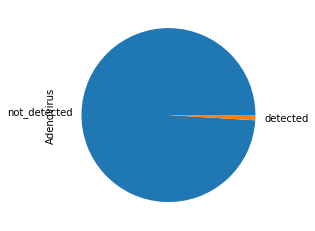

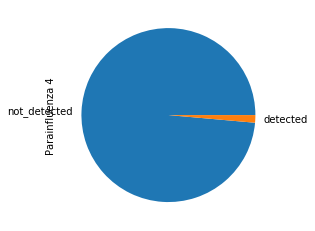

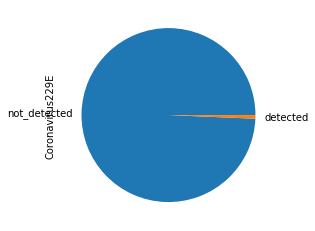

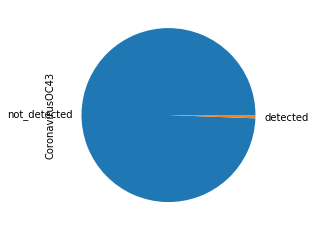

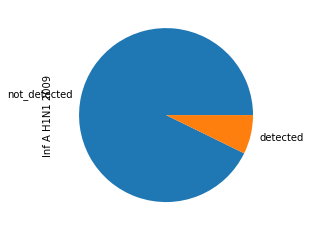

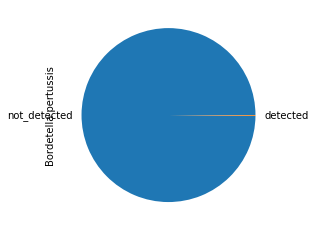

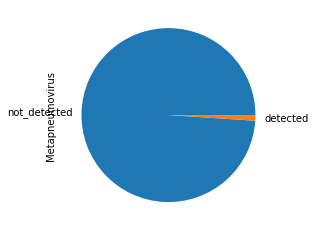

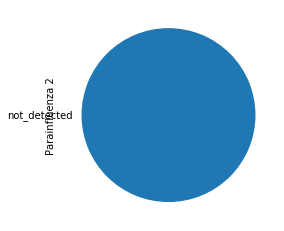

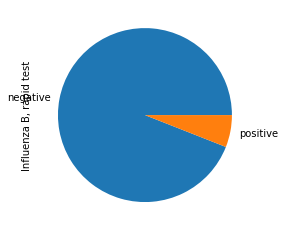

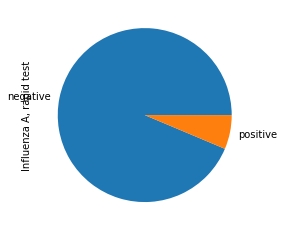

In [7]:
#Plusieurs patients sont atteints de Rhinovirus/Enterovirus
df=df.drop(['Patient ID'],axis=1)
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()
    #plt.legend()

In [8]:
for col in df.select_dtypes('object'):
    print(f'{col :.<50} {df[col].unique()}')

SARS-Cov-2 exam result............................ ['negative' 'positive']
Respiratory Syncytial Virus....................... [nan 'not_detected' 'detected']
Influenza A....................................... [nan 'not_detected' 'detected']
Influenza B....................................... [nan 'not_detected' 'detected']
Parainfluenza 1................................... [nan 'not_detected' 'detected']
CoronavirusNL63................................... [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus............................ [nan 'detected' 'not_detected']
Coronavirus HKU1.................................. [nan 'not_detected' 'detected']
Parainfluenza 3................................... [nan 'not_detected' 'detected']
Chlamydophila pneumoniae.......................... [nan 'not_detected' 'detected']
Adenovirus........................................ [nan 'not_detected' 'detected']
Parainfluenza 4................................... [nan 'not_detected' 'detected']
Coronavirus2

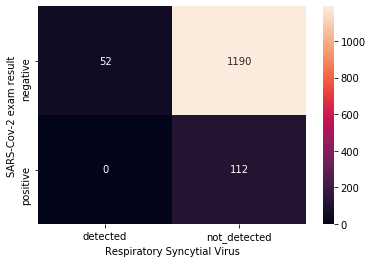

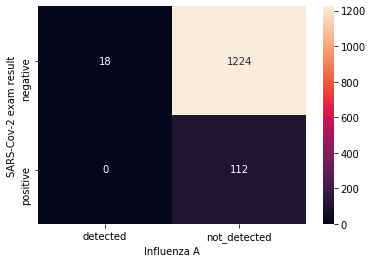

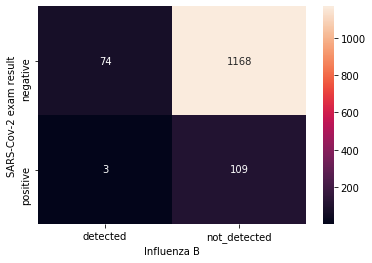

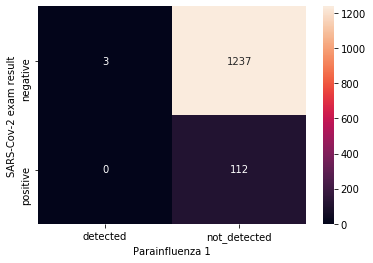

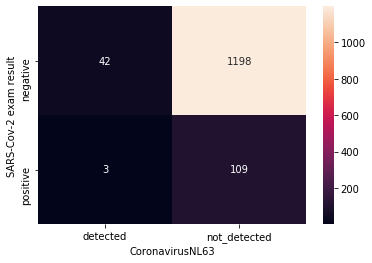

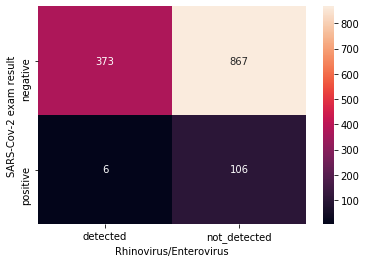

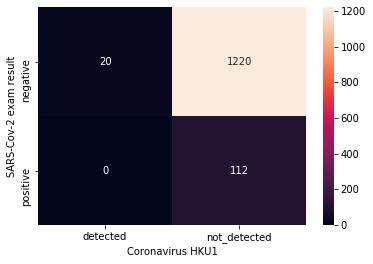

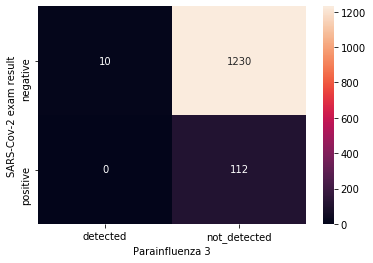

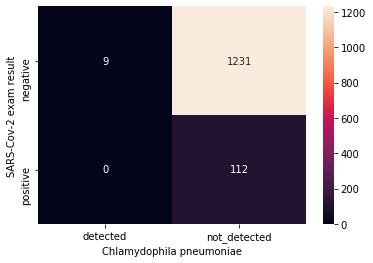

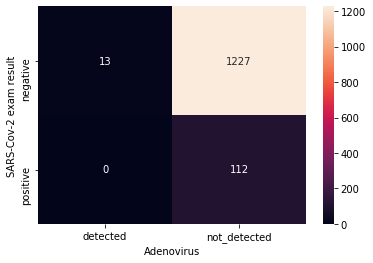

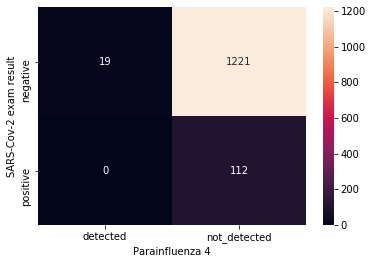

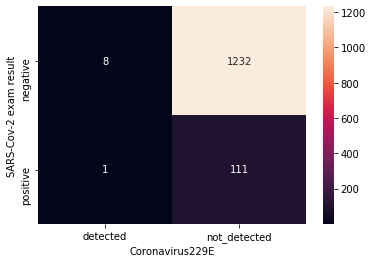

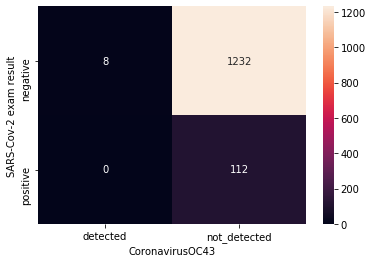

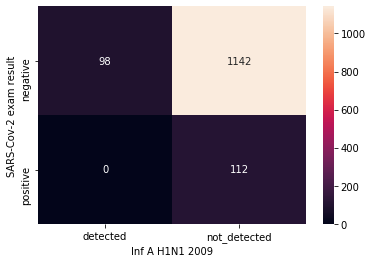

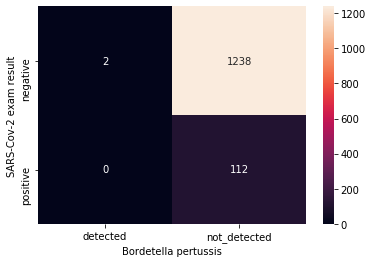

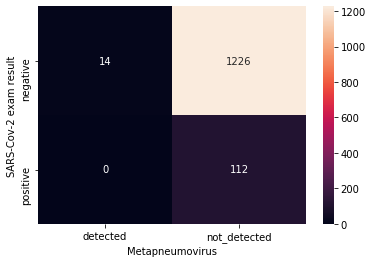

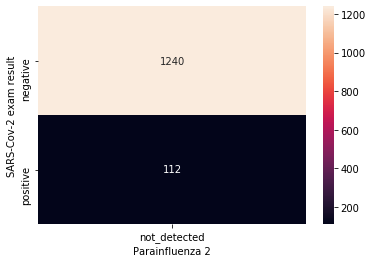

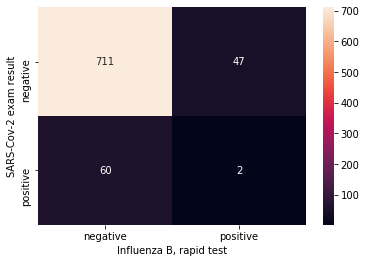

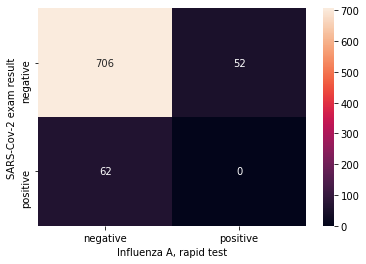

In [9]:
for col in viral :
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True,fmt='d')

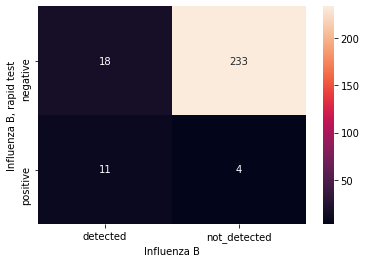

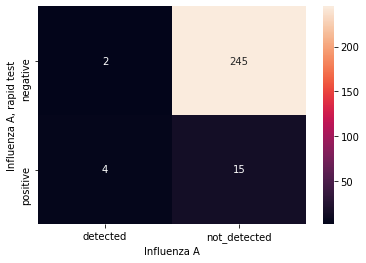

In [10]:
plt.figure()
sns.heatmap(pd.crosstab(df['Influenza B, rapid test'],df['Influenza B']),annot=True,fmt='d')
plt.figure()
sns.heatmap(pd.crosstab(df['Influenza A, rapid test'],df['Influenza A']),annot=True,fmt='d')

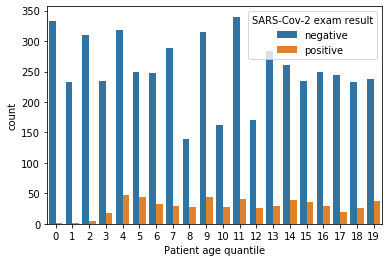

In [11]:
#Relation de la target avec l'age==> les patients ayant un age inférieur à 3 ne sont pas trop impacté 
#(aucune explication sur les valeurs dans la colonne age )
sns.countplot(x=df['Patient age quantile'], hue=df['SARS-Cov-2 exam result'])
#df['Patient age quantile'].hist(bins=20)

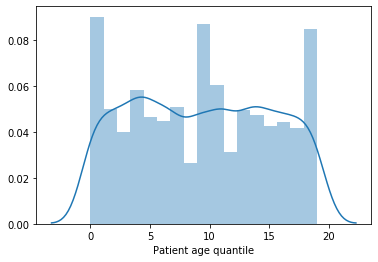

In [12]:
sns.distplot(df['Patient age quantile'])

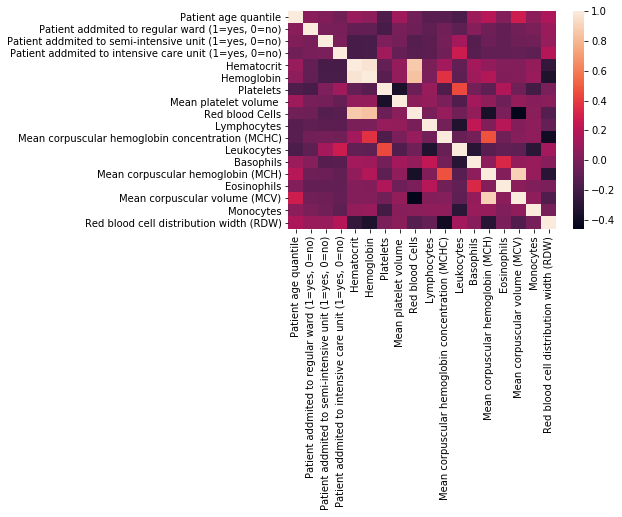

In [13]:
#relation entre les variable blood
sns.heatmap(df.corr(),)

In [14]:
#création colonne des affectation des soins 
def hospitalisation(df) :
    if df['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1:
        return'semi_intensive'   
    if df['Patient addmited to intensive care unit (1=yes, 0=no)']==1:
        return'intensive'
    elif df['Patient addmited to regular ward (1=yes, 0=no)']==1:
        return'regular_ward'
    else :
        return 'not_admitted'
      

In [15]:
df['statut']=df.apply(hospitalisation, axis=1)

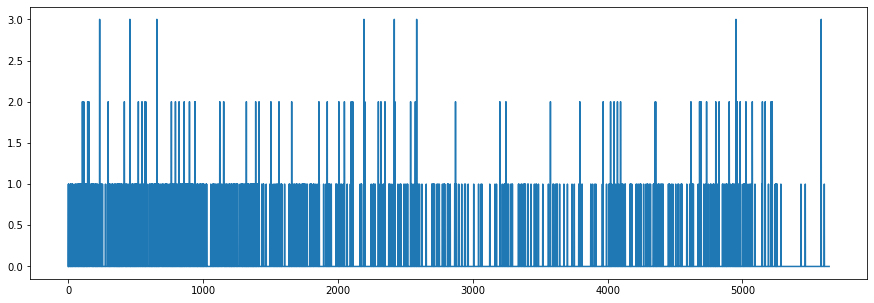

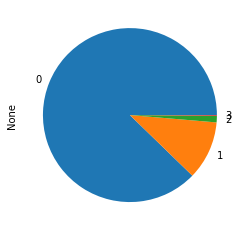

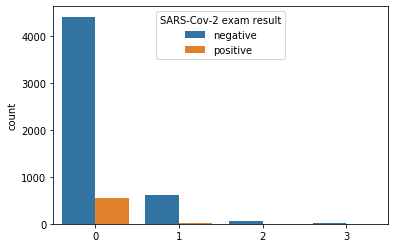

In [16]:
#creation de la colonne Malade : la pluspart des gens atteint de covid19 n'ont pas été impacté par une autre maladie
plt.figure(figsize=(15,5))
(np.sum(viral=='detected',axis=1)).plot()
plt.figure()
np.sum(viral=='detected',axis=1).value_counts().plot.pie()
plt.figure()
sns.countplot(x=np.sum(viral=='detected',axis=1),hue=df['SARS-Cov-2 exam result'])



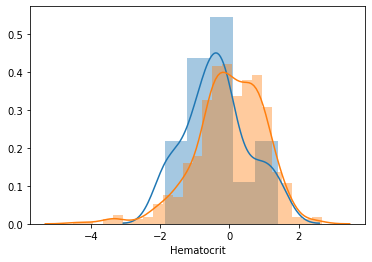

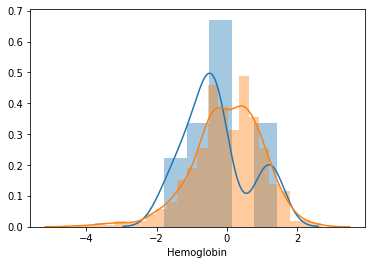

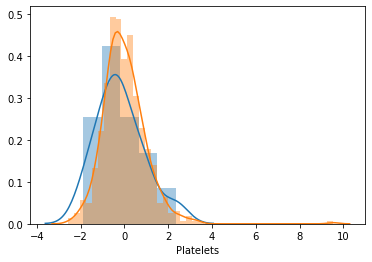

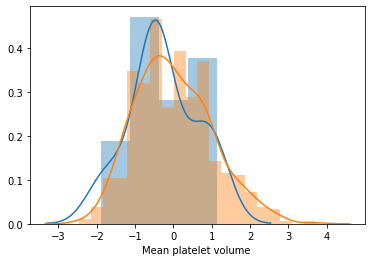

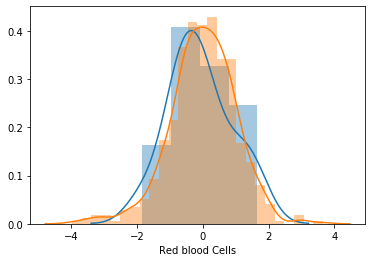

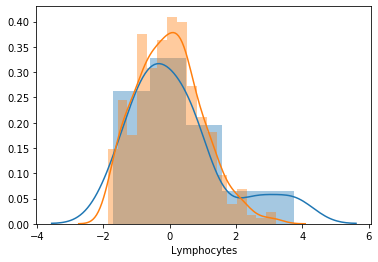

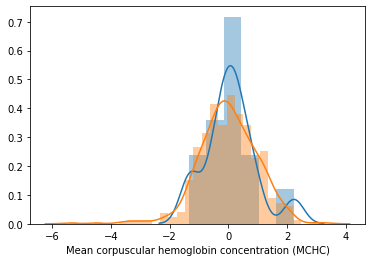

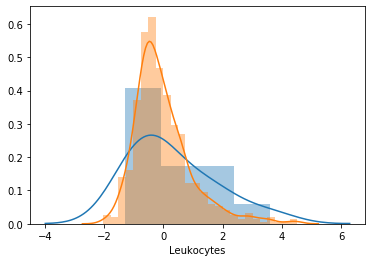

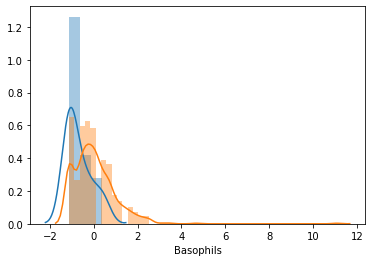

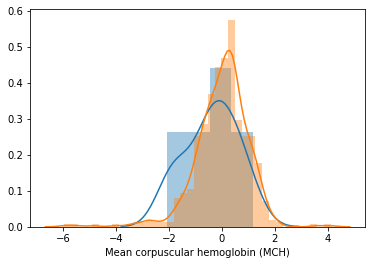

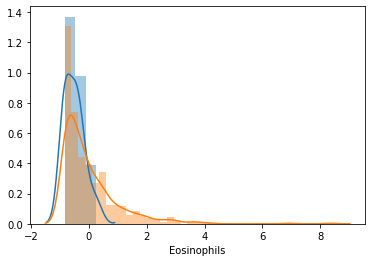

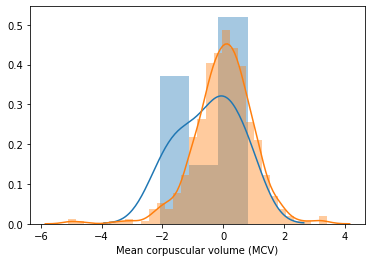

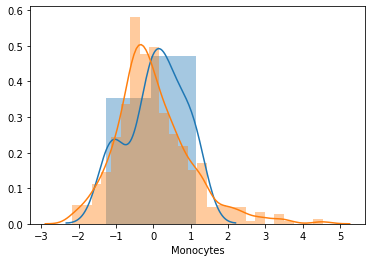

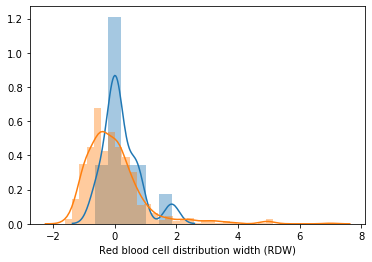

In [17]:
#Les taux sanguin entre maladies et covid19 sont différents 
df['maladie']=np.sum(viral=='detected',axis=1)>1
malade=df[df['maladie']==True]
non_malade=df[df['maladie']==False]
for col in blood:
   plt.figure()
   sns.distplot(malade[col])
   sns.distplot(non_malade[col])

In [18]:
df[df['maladie']==True]

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",statut,maladie
105,15,negative,0,0,0,-0.450142,-0.460932,-0.542537,1.132609,-0.779514,-0.671003,-0.154166,-1.138157,-1.140144,0.648619,-0.835508,0.807138,-0.220244,-0.005877,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,negative,negative,not_admitted,True
115,17,negative,0,0,0,-0.038148,-0.147652,-0.404357,-0.213711,-0.039039,-0.363958,-0.452899,-1.024063,0.387152,-0.239998,-0.245556,-0.034103,0.042388,-0.005877,not_detected,not_detected,detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,not_admitted,True
144,1,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,NaN,NaN,not_admitted,True
153,0,negative,0,0,0,-0.152590,-0.460932,1.065375,-0.438097,0.472242,3.764100,-1.249524,-0.080696,-1.140144,-1.651331,-0.835508,-1.255906,-1.270772,0.613318,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,positive,negative,not_admitted,True
233,1,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,NaN,NaN,not_admitted,True
296,1,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,not_admitted,True
416,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,not_admitted,True
457,0,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,detected,detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,not_admitted,True
520,4,negative,0,0,0,-0.289922,-0.084996,-0.090311,-0.325903,-0.215342,-0.449248,0.742040,0.013919,0.387152,0.230447,0.260116,-0.154280,0.935337,-0.182790,not_detected,not_detected,detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,nega

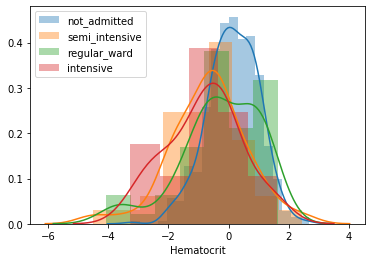

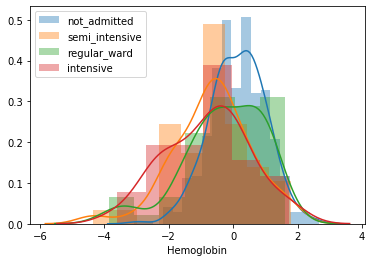

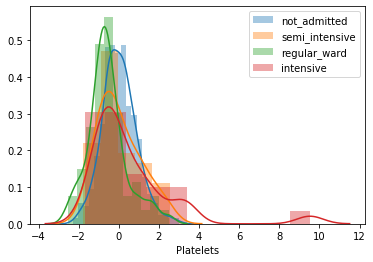

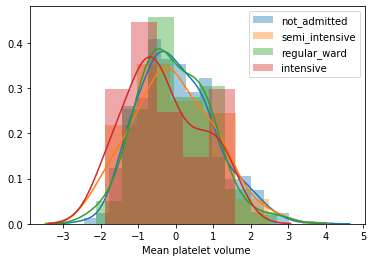

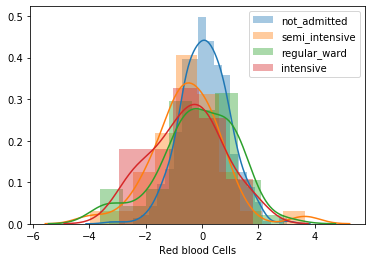

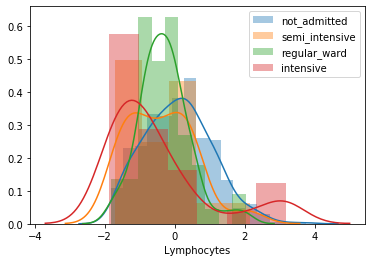

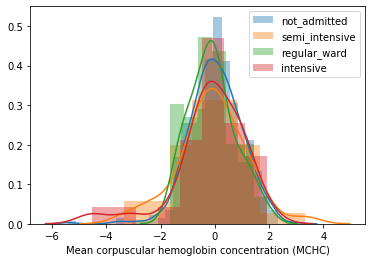

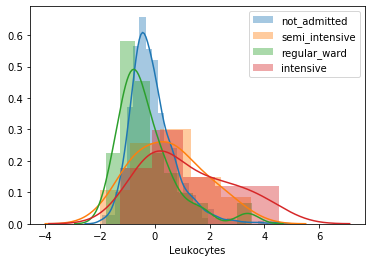

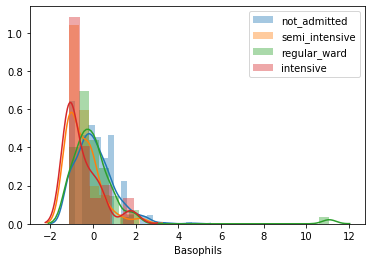

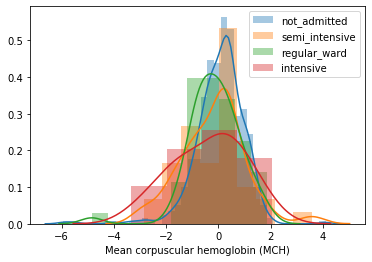

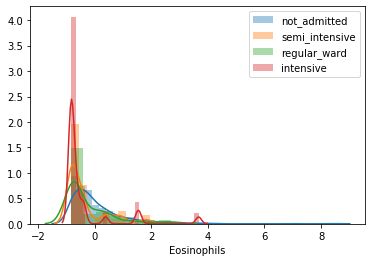

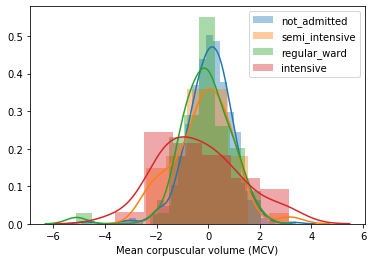

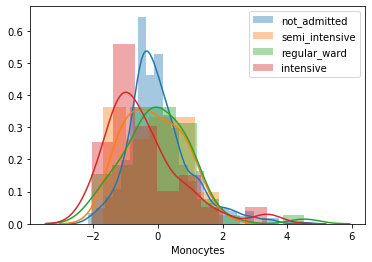

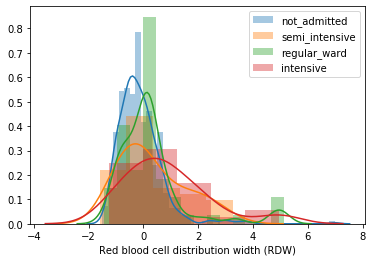

In [19]:
for col in blood:
    plt.figure()
    for cat in df['statut'].unique():
      sns.distplot(df[col][df['statut']==cat],label=cat)
      plt.legend() 
      

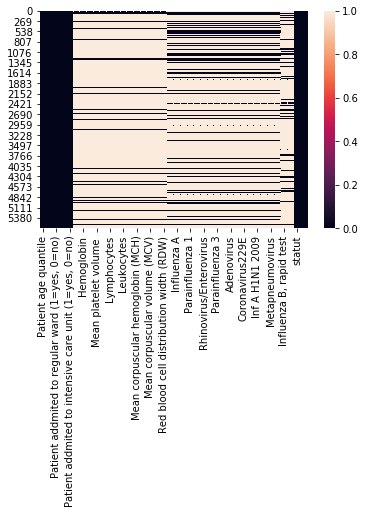

In [20]:
sns.heatmap(df.isna())


In [21]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

In [22]:
df.dropna()['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.868687
positive    0.131313
Name: SARS-Cov-2 exam result, dtype: float64

In [23]:
#1352(92/8)
df1=viral[viral.columns[:-3]]
df1['covid']=df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\p084466\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [24]:
#603(87/13)
df2=blood.copy()
df2['covid']=df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

negative    0.864548
positive    0.135452
Name: covid, dtype: float64

In [25]:
#test pour valider l'hypothèse H0
#H0 les taux moyens des variables blood sont EGAUX entre les individus positifs et négatif.

In [26]:
from scipy.stats import ttest_ind
positive['Hematocrit'].dropna().shape

(83,)

In [35]:
#negative.shape
#negative_red= negative.sample(positive.shape[0])
#negative_red['Hematocrit'].dropna().shape


In [40]:
def student (col): 
    alphe = 0.002
    t ,p =ttest_ind(positive[col].dropna(),negative[col].dropna() )
   # print(t)
    if p < alphe :
        return 'H0 rejected',p
    else :
        return 'H0 True',p

In [41]:
for col in blood.columns : 
    print (f'{col:-<50} {student(col)}' )

Hematocrit---------------------------------------- ('H0 True', 0.014894440053624029)
Hemoglobin---------------------------------------- ('H0 True', 0.010034941303858628)
Platelets----------------------------------------- ('H0 rejected', 1.723391223376746e-12)
Mean platelet volume ----------------------------- ('H0 True', 0.007674271193860533)
Red blood Cells----------------------------------- ('H0 True', 0.0028684205164349456)
Lymphocytes--------------------------------------- ('H0 True', 0.7090372117095622)
Mean corpuscular hemoglobin concentration (MCHC)-- ('H0 True', 0.26166296186738885)
Leukocytes---------------------------------------- ('H0 rejected', 5.273455451891494e-13)
Basophils----------------------------------------- ('H0 True', 0.12260845516765818)
Mean corpuscular hemoglobin (MCH)----------------- ('H0 True', 0.4855107675593293)
Eosinophils--------------------------------------- ('H0 rejected', 1.9300117841550804e-06)
Mean corpuscular volume (MCV)--------------------- ('H

In [42]:
influenzaAP=df[df['Influenza B']=='detected']
influenzaAN=df[df['Influenza B']=='not_detected']
influenzaAN.shape

(1277, 40)

In [43]:
def studentinf (col): 
    alphe = 0.02
    t ,p =ttest_ind(influenzaAP[col].dropna(),influenzaAN[col].dropna() )
   # print(t)
    if p < alphe :
        return 'H0 rejected',p
    else :
        return 'H0 True',p

In [44]:
for col in blood.columns : 
    print (f'{col:-<50} {studentinf(col)}' )

Hematocrit---------------------------------------- ('H0 True', 0.6937316997952123)
Hemoglobin---------------------------------------- ('H0 True', 0.5387794266367796)
Platelets----------------------------------------- ('H0 True', 0.1521036726976107)
Mean platelet volume ----------------------------- ('H0 True', 0.7657898610136261)
Red blood Cells----------------------------------- ('H0 True', 0.8640904697584196)
Lymphocytes--------------------------------------- ('H0 True', 0.6040602704334916)
Mean corpuscular hemoglobin concentration (MCHC)-- ('H0 True', 0.3221509356220449)
Leukocytes---------------------------------------- ('H0 True', 0.1367770482594705)
Basophils----------------------------------------- ('H0 rejected', 0.01251892985616308)
Mean corpuscular hemoglobin (MCH)----------------- ('H0 True', 0.35717708803422177)
Eosinophils--------------------------------------- ('H0 rejected', 0.014089544618570614)
Mean corpuscular volume (MCV)--------------------- ('H0 True', 0.6160017487

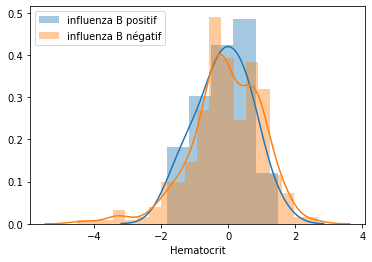

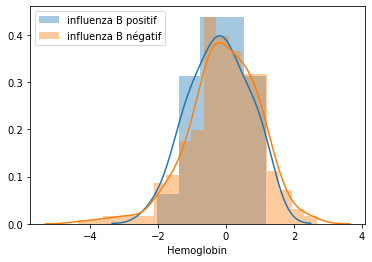

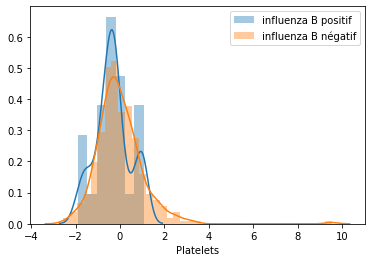

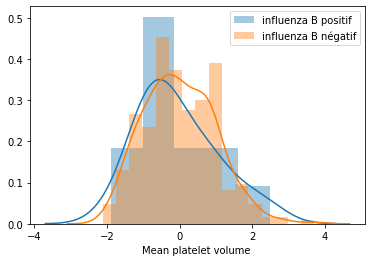

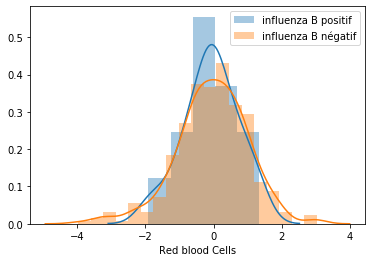

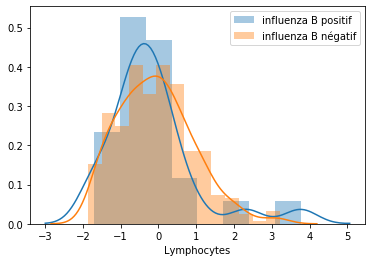

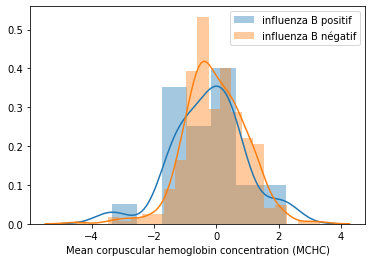

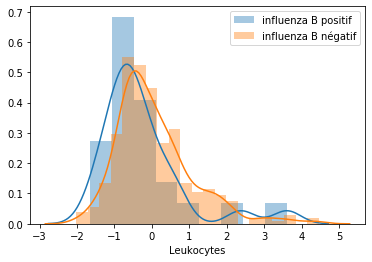

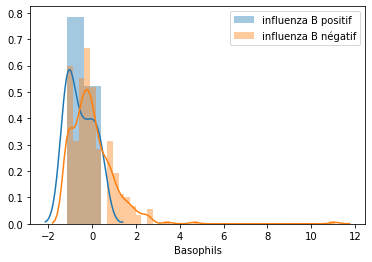

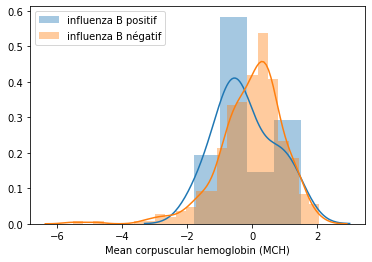

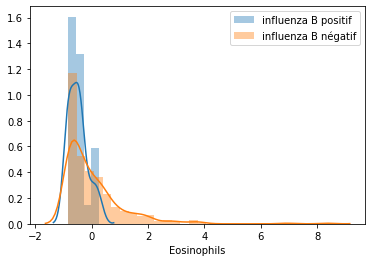

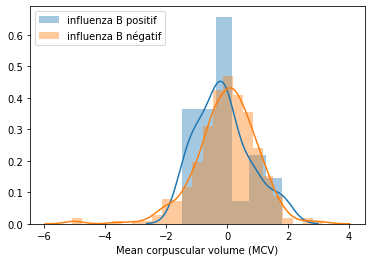

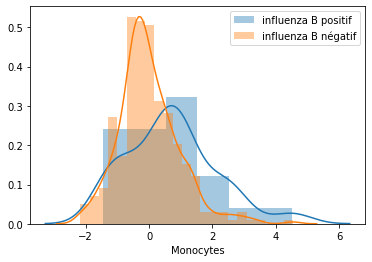

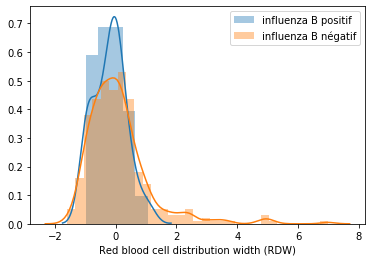

In [33]:
for col in blood.columns:
    plt.figure()
    sns.distplot(influenzaAP[col],label='influenza B positif')
    sns.distplot(influenzaAN[col],label='influenza B négatif')
    plt.legend()
   

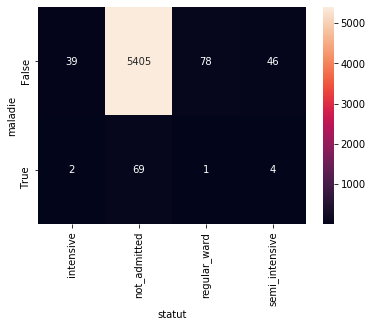

In [34]:
plt.figure()
#for cat in df['maladie'].unique():
#    sns.countplot(x=np.sum(malade==cat,axis=1),hue=df['statut'])
sns.heatmap(pd.crosstab(df['maladie'], df['statut']), annot=True, fmt='d')